In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib as plt
import numpy as np
import os
import xlrd
import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
# 输入原始数据
df_aoi=pd.read_csv('d:\\user\\01389648\\desktop\\PythonWorkSpace\\2020算法_数据分析挑战赛\\算法大赛\\aoi信息.csv')
df_xiaoge=pd.read_csv('d:\\user\\01389648\\desktop\\PythonWorkSpace\\2020算法_数据分析挑战赛\\算法大赛\\小哥列表.csv')
df_jianliang=pd.read_csv('d:\\user\\01389648\\desktop\\PythonWorkSpace\\2020算法_数据分析挑战赛\\算法大赛\\比赛-件量-train.csv')

In [4]:
df_jianliang.head()

Unnamed: 0  date_str   aoi_id  pai_num  shou_num zone_id
0           0  20200301  aoi_106        6         5  zone_0
1           1  20200301  aoi_131        8         4  zone_0
2           2  20200301   aoi_14       10         2  zone_0
3           3  20200301  aoi_147        4         2  zone_0
4           4  20200301  aoi_174       47       204  zone_0

In [5]:
df_jianliang_all=df_jianliang.groupby(['zone_id','date_str',]).agg({'pai_num':sum,'shou_num':sum}).reset_index()

In [6]:
df_jianliang_all.head()

zone_id  date_str  pai_num  shou_num
0  zone_0  20200301      481      1062
1  zone_0  20200302      478       470
2  zone_0  20200303      603       476
3  zone_0  20200304      565       437
4  zone_0  20200305      545       440

In [7]:
df_shou=df_jianliang_all[['zone_id','date_str','shou_num']]

In [8]:
df_shou

zone_id  date_str  shou_num
0     zone_0  20200301      1062
1     zone_0  20200302       470
2     zone_0  20200303       476
3     zone_0  20200304       437
4     zone_0  20200305       440
...      ...       ...       ...
4873  zone_9  20200806       242
4874  zone_9  20200807       259
4875  zone_9  20200808        91
4876  zone_9  20200809       100
4877  zone_9  20200810       252

[4878 rows x 3 columns]

In [9]:
df_shou['date_str']=df_shou['date_str'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_shou['date']=pd.to_datetime(df_shou['date_str'])

In [11]:
df_shou['weekday']=df_shou['date_str'].apply(lambda x: datetime.datetime.strptime(x,'%Y%m%d').weekday()+1)
df_shou

zone_id  date_str  shou_num       date  weekday
0     zone_0  20200301      1062 2020-03-01        7
1     zone_0  20200302       470 2020-03-02        1
2     zone_0  20200303       476 2020-03-03        2
3     zone_0  20200304       437 2020-03-04        3
4     zone_0  20200305       440 2020-03-05        4
...      ...       ...       ...        ...      ...
4873  zone_9  20200806       242 2020-08-06        4
4874  zone_9  20200807       259 2020-08-07        5
4875  zone_9  20200808        91 2020-08-08        6
4876  zone_9  20200809       100 2020-08-09        7
4877  zone_9  20200810       252 2020-08-10        1

[4878 rows x 5 columns]

In [12]:
df_shou_24=df_shou[df_shou['zone_id']=='zone_24'][['date','shou_num','weekday']]

In [13]:
df_shou_24.rename(columns={'date':'ds','shou_num':'y'},inplace=True)

In [14]:
df_shou_24

ds    y  weekday
2766 2020-03-01  187        7
2767 2020-03-02  418        1
2768 2020-03-03  369        2
2769 2020-03-04  381        3
2770 2020-03-05  478        4
...         ...  ...      ...
2924 2020-08-06  392        4
2925 2020-08-07  406        5
2926 2020-08-08  289        6
2927 2020-08-09   97        7
2928 2020-08-10  393        1

[163 rows x 3 columns]

# 预测基础版

In [15]:
m=Prophet()
m.fit(df_shou_24)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future=m.make_future_dataframe(periods=21)
future.tail()

ds
179 2020-08-27
180 2020-08-28
181 2020-08-29
182 2020-08-30
183 2020-08-31

In [17]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
179 2020-08-27  407.300963  311.619323  503.792897
180 2020-08-28  382.154260  278.710737  483.119826
181 2020-08-29  234.281832  141.916407  326.575218
182 2020-08-30  131.784535   35.699568  218.156464
183 2020-08-31  380.105485  286.334430  473.925354

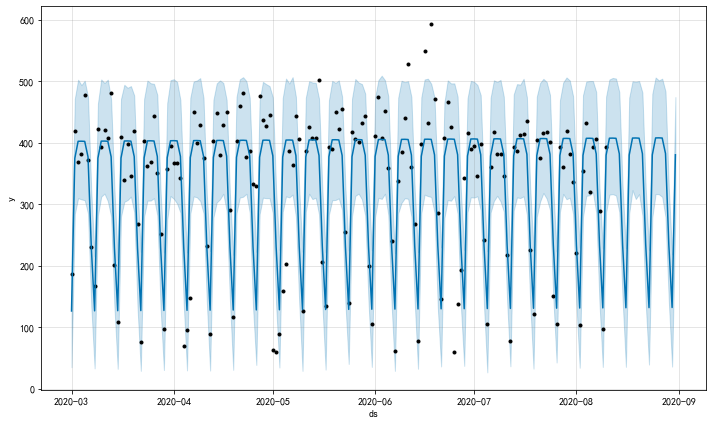

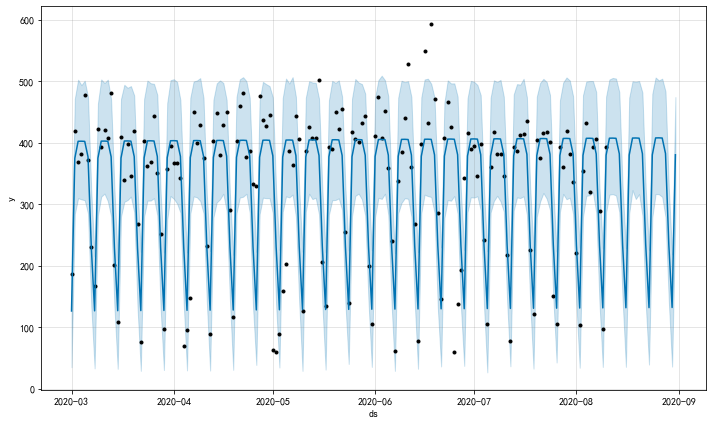

In [18]:
m.plot(forecast)

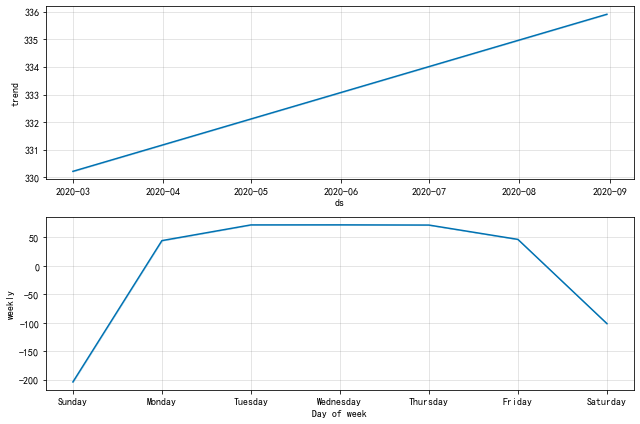

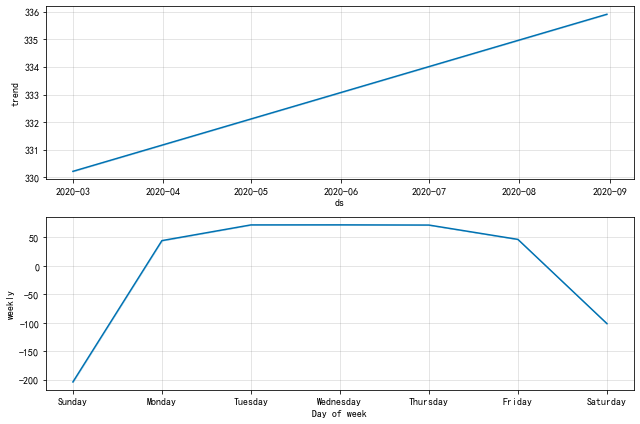

In [19]:
m.plot_components(forecast)

In [20]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='90 days', period='7 days', horizon = '7 days')
df_cv.to_excel('d:\\user\\01389648\\desktop\\PythonWorkSpace\\2020算法_数据分析挑战赛\\算法大赛\\收件预测24_10cutoff.xlsx')
df_cv

INFO:fbprophet:Making 10 forecasts with cutoffs between 2020-06-01 00:00:00 and 2020-08-03 00:00:00


ds        yhat  yhat_lower  yhat_upper    y     cutoff
0  2020-06-02  395.936959  307.575407  484.423357  474 2020-06-01
1  2020-06-03  410.397131  318.793386  506.153075  408 2020-06-01
2  2020-06-04  416.472714  313.358145  509.364130  451 2020-06-01
3  2020-06-05  396.317542  294.818050  496.446670  359 2020-06-01
4  2020-06-06  236.086196  137.506955  328.802692  240 2020-06-01
..        ...         ...         ...         ...  ...        ...
65 2020-08-06  405.205867  311.130817  500.812762  392 2020-08-03
66 2020-08-07  378.303780  286.592433  478.643918  406 2020-08-03
67 2020-08-08  229.092751  138.838408  327.134798  289 2020-08-03
68 2020-08-09  130.461744   36.956418  226.367648   97 2020-08-03
69 2020-08-10  376.632432  280.291561  475.290087  393 2020-08-03

[70 rows x 6 columns]

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

# 预测增加workday

In [ ]:
df_workday=pd.read_csv('d:\\user\\01389648\\desktop\\PythonWorkSpace\\2020算法_数据分析挑战赛\\算法大赛\\workdays2020.csv')
df_workday

In [ ]:
df_workday['date']=df_workday['date'].astype(str)
df_workday['dt']=pd.to_datetime(df_workday['date'])

In [ ]:
df_workday

In [ ]:
df_shou_24=df_shou_24.merge(df_workday, left_on='ds', right_on='dt')
df_shou_24

In [ ]:
m=Prophet(changepoint_prior_scale=0.5)
m.add_regressor('workdays')
m.fit(df_shou_24)

In [ ]:
m.plot_components(forecast)

In [ ]:
future=m.make_future_dataframe(periods=21)
future

In [ ]:
future=future.merge(df_workday, left_on='ds', right_on='dt')[['ds','workdays']]
future

In [ ]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='120 days', period='7 days', horizon = '7 days')
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p